In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score

# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')


# About Dataset
This dataset is take from **KAGGLE**. It is about Default Payments of Credit Card Clients in Taiwan from 2005

Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


# Main objective
We will predict the payment defaulters on the basis of the dataset provided.Dataset will be splitted into train and test sets.Training dataset will then be trained on different models after that we will find which model will works the best. Best criteria will be based on on accuracy, f1 etc

# Stakeholders
By this analysis, our stakeholders will get to know that how our customers are defaulting and customer who have the tendency to default in future payments. It will be very beneficial for our stakeholders to get to know in advance, which customers are going to default beacuse if they know who all have the tendencies to deafault then they can concentreate on creating strategies and robust rules so that customers should default less.

# Main Objective
* Does the report include a section describing the data? - Done
* Does the report include a paragraph detailing the main objective(s) of this analysis? - Done
* Does the report include a section with variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis?
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 

# Sections required in your report:

* Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data. - Done
* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.- Done
* Brief summary of data exploration and actions taken for data cleaning and feature engineering.
* Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.
* A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.
* Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

In [2]:
data=pd.read_csv('/kaggle/input/uci-credit-card/UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Exploration

In [3]:
data.shape

(30000, 25)

In [4]:
data.columns=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default']
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [5]:
# Finding the unique values in every column
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11


In [6]:
# Check for missing values in dataset  - There are no missing values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

<AxesSubplot:>

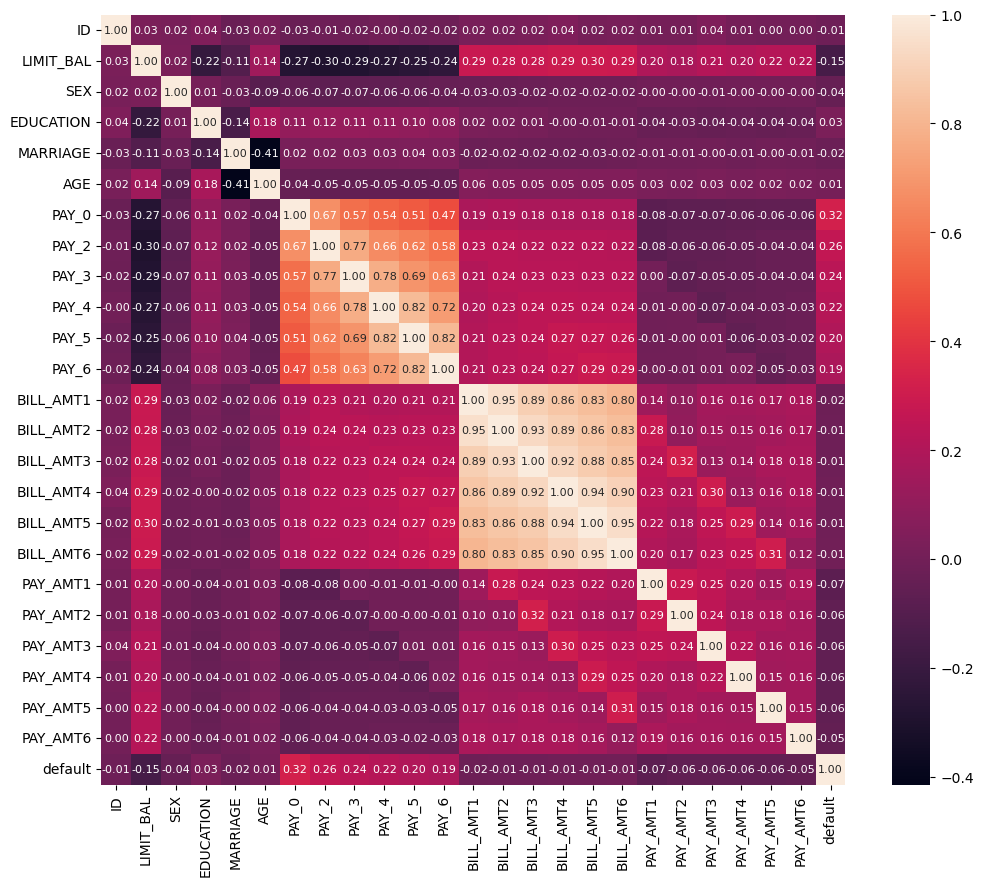

In [7]:
# Checking the correlation between varibles
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True, linewidths=0,fmt='.2f',annot_kws={"size": 8})

In [8]:
# Check the dataset target variables is balanced or unbalanced
print("Defaulters are more in numbers than non defaulters \n",data.default.value_counts(normalize=True),"")

Defaulters are more in numbers than non defaulters 
 0    0.7788
1    0.2212
Name: default, dtype: float64 


# Splitting Data

In [9]:
# Get the split indexes
feature_cols = list(data.columns)
feature_cols.remove('default')
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train, test = next(strat_shuf_split.split(data[feature_cols], data.default))

# Create the dataframes
X_train = data.loc[train, feature_cols]
y_train = data.loc[train, 'default']

X_test  = data.loc[test, feature_cols]
y_test  = data.loc[test, 'default']
len(X_test), len(X_train)

(9000, 21000)

In [10]:
# effects of stratified shufflesplit
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(0    0.77881
 1    0.22119
 Name: default, dtype: float64,
 0    0.778778
 1    0.221222
 Name: default, dtype: float64)

# Model Training and Predictions

# Logistic Regression

In [11]:
# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_stats = pd.Series({'precision':precision_score(y_test, y_pred_lr),
                      'recall':recall_score(y_test, y_pred_lr),
                      'accuracy':accuracy_score(y_test, y_pred_lr),
                      'f1score':f1_score(y_test, y_pred_lr),
                      'auc': roc_auc_score(y_test, y_pred_lr)},
                     name='Logistic Regression')

df_lr_final=pd.DataFrame(lr_stats).transpose()
df_lr_final

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.0,0.0,0.778778,0.0,0.5


# K Nearest neighbors

In [12]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Fitting the model
knn = knn.fit(X_train, y_train)
# Predicting the model
y_pred_knn = knn.predict(X_test)

knn_stats = pd.Series({'precision':precision_score(y_test, y_pred_knn),
                      'recall':recall_score(y_test, y_pred_knn),
                      'accuracy':accuracy_score(y_test, y_pred_knn),
                      'f1score':f1_score(y_test, y_pred_knn),
                      'auc': roc_auc_score(y_test, y_pred_knn)
                                      }, name='KNN')

df_knn_final=pd.DataFrame(knn_stats).transpose()
df_knn_final

,precision,recall,accuracy,f1score,auc
KNN,0.329779,0.217479,0.729111,0.262107,0.545963


# Decision Trees

In [13]:
dt = DecisionTreeClassifier(random_state=42)
# Fitting the model
dt.fit(X_train, y_train)
# Predicting the model
y_pred_dt = dt.predict(X_test)

dt_stats = pd.Series({'precision':precision_score(y_test, y_pred_dt),
                      'recall':recall_score(y_test, y_pred_dt),
                      'accuracy':round(accuracy_score(y_test, y_pred_dt), 2),
                      'f1score':round(f1_score(y_test, y_pred_dt), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_dt),2)}, name='Decision Tree')

df_dt_final=pd.DataFrame(dt_stats).transpose()
df_dt_final

,precision,recall,accuracy,f1score,auc
Decision Tree,0.385525,0.409342,0.72,0.4,0.61


# Random Forests

In [14]:
# Initialize the random forest estimator
rf = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
# Fitting the model
rf.fit(X_train, y_train)
# Predicting the model
y_pred_rf = rf.predict(X_test)

rf_stats = pd.Series({'precision':precision_score(y_test, y_pred_rf),
                      'recall':recall_score(y_test, y_pred_rf),
                      'accuracy':round(accuracy_score(y_test, y_pred_rf), 2),
                      'f1score':round(f1_score(y_test, y_pred_rf), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_rf),2)}, name='Random Forest')

df_rf_final=pd.DataFrame(rf_stats).transpose()
df_rf_final

,precision,recall,accuracy,f1score,auc
Random Forest,0.65045,0.362632,0.82,0.47,0.65


# Gradient Boosting Classifier

In [15]:
# Initialize the random forest estimator
gb = GradientBoostingClassifier(random_state=42)
# Fiting the model
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_stats = pd.Series({'precision':precision_score(y_test, y_pred_gb),
                      'recall':recall_score(y_test, y_pred_gb),
                      'accuracy':round(accuracy_score(y_test, y_pred_gb), 2),
                      'f1score':round(f1_score(y_test, y_pred_gb), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_gb),2)}, name='Gradient boosting')

df_gb_final=pd.DataFrame(gb_stats).transpose()
df_gb_final

,precision,recall,accuracy,f1score,auc
Gradient boosting,0.666983,0.353089,0.82,0.46,0.65


In [16]:
final_report=df_lr_final.append(df_knn_final).append(df_dt_final).append(df_rf_final).append(df_gb_final)
final_report

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.000000,0.000000,0.778778,0.000000,0.500000
KNN,0.329779,0.217479,0.729111,0.262107,0.545963
Decision Tree,0.385525,0.409342,0.720000,0.400000,0.610000
Random Forest,0.650450,0.362632,0.820000,0.470000,0.650000
Gradient boosting,0.666983,0.353089,0.820000,0.460000,0.650000
